In [74]:
# convertisseur NDVI -> jpeg : https://convertio.co/fr/download/714f6c422fd554cc8de9ea2c6477b53b2e2502/
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import seaborn as sns
from scipy.cluster.vq import kmeans, vq
from PIL import Image

In [75]:
def rgb_to_hex(rgb_color) :
    hex_color = "#"
    for i in rgb_color :
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [76]:
rgb_to_hex((245,0,0)) # test

'#f50000'

In [77]:
image = 'CEndviImage.jpg'
raw_img = cv2.imread(image)
raw_img = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) # When reading a color image file, 
#OpenCV imread() reads as a NumPy array ndarray of row (height) x column (width) x color (3). 
#The order of color is BGR (blue, green, red).
# C'est pourquoi nous appliquons cv2.COLOR_BGR2RGB

In [78]:
img = cv2.resize(raw_img,(900,600), interpolation=cv2.INTER_AREA)
img.shape

(600, 900, 3)

In [81]:
img = img.reshape(img.shape[0]*img.shape[1],3)
img.shape # 540000 Lignes & 3 colonnes

(540000, 3)

In [82]:
rouge = []
vert = []
bleu = []
for ligne in range(img.shape[0]):
    rouge.append(img[ligne][0])
    vert.append(img[ligne][1])
    bleu.append(img[ligne][2])
df = pd.DataFrame({'rouge':rouge,'vert':vert,'bleu':bleu})
print(df) # ici je ne sais pas pourquoi mais pour certaines valeur pandas s'amuse à me prendre les valeurs de img 
# - la valeur 256
print("Le jeu de données à partir duquel on crée le dataframe")
print(img)
for l in range(len(df)):
    if df.iloc[l,0] < 0 :
        df.iloc[l,0] = 256 + df.iloc[l,0]
    if df.iloc[l,1] < 0 :
        df.iloc[l,1] = 256 + df.iloc[l,1]
print(df)


        rouge  vert  bleu
0         -89   -31    70
1         -78   -14    87
2         -91   -21    84
3         -87   -18    81
4         -78   -22    68
...       ...   ...   ...
539995      7    96    85
539996      6    98    85
539997      6   100    84
539998      0    97    80
539999     18   115    98

[540000 rows x 3 columns]
Le jeu de données à partir duquel on crée le dataframe
[[167 225  70]
 [178 242  87]
 [165 235  84]
 ...
 [  6 100  84]
 [  0  97  80]
 [ 18 115  98]]
        rouge  vert  bleu
0         167   225    70
1         178   242    87
2         165   235    84
3         169   238    81
4         178   234    68
...       ...   ...   ...
539995      7    96    85
539996      6    98    85
539997      6   100    84
539998      0    97    80
539999     18   115    98

[540000 rows x 3 columns]


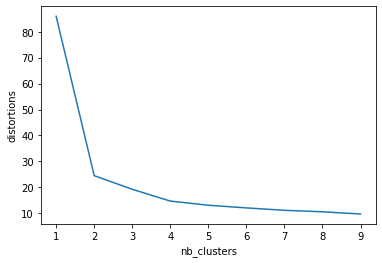

In [83]:
distortions = []
nb_clusters = range(1,10)
for i in nb_clusters :
    cluster_centers, distortion = kmeans(df[['rouge','vert','bleu']].values.astype(float), i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'nb_clusters': nb_clusters, 'distortions': distortions})

sns.lineplot(x='nb_clusters', y='distortions', data = elbow_plot)
plt.xticks(nb_clusters)
plt.show()


In [84]:
# Grâce à la "elbow method" on peut voir que la valeur optimale K (nb_clusters) est 2
clf = KMeans(n_clusters=2)
color_labels = clf.fit_predict(img)
center_colors = clf.cluster_centers_
color_labels

array([1, 1, 1, ..., 0, 0, 0])

In [47]:
center_colors

array([[ 38.43497664, 133.11977392, 137.00122138],
       [113.2316675 , 202.83355656,  88.69172387]])

In [48]:
counts = Counter(color_labels)
counts

Counter({1: 71746, 0: 468254})

In [49]:
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
hex_colors

['#268589', '#71ca58']

([<matplotlib.patches.Wedge at 0x270f5ff4e50>,
 [Text(1.0055600394402617, 0.44592488950595605, '#268589'),
  Text(-1.0055600603155115, -0.4459248424322928, '#71ca58')])

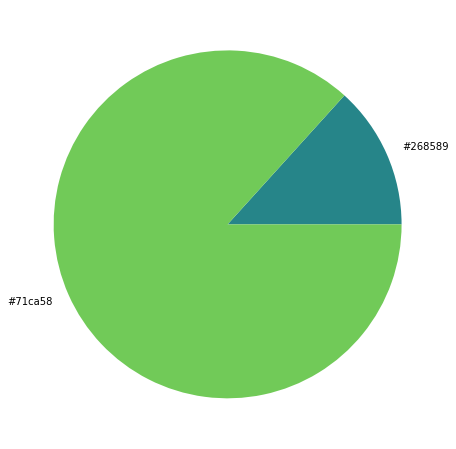

In [50]:
plt.figure(figsize=(12,8))
plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)


In [51]:
print(counts.values())
hex_colors

dict_values([71746, 468254])


['#268589', '#71ca58']

In [62]:
# palette = sns.color_palette('deep')
#couleurs = []
#for i in color_labels:
#  if i == 0:
#    couleurs.append(palette[0])
#  elif i == 1:
#    couleurs.append(palette[1])
#print(palette)
#plt.scatter(df['rouge'], df['bleu'], c = couleurs)
#plt.show()

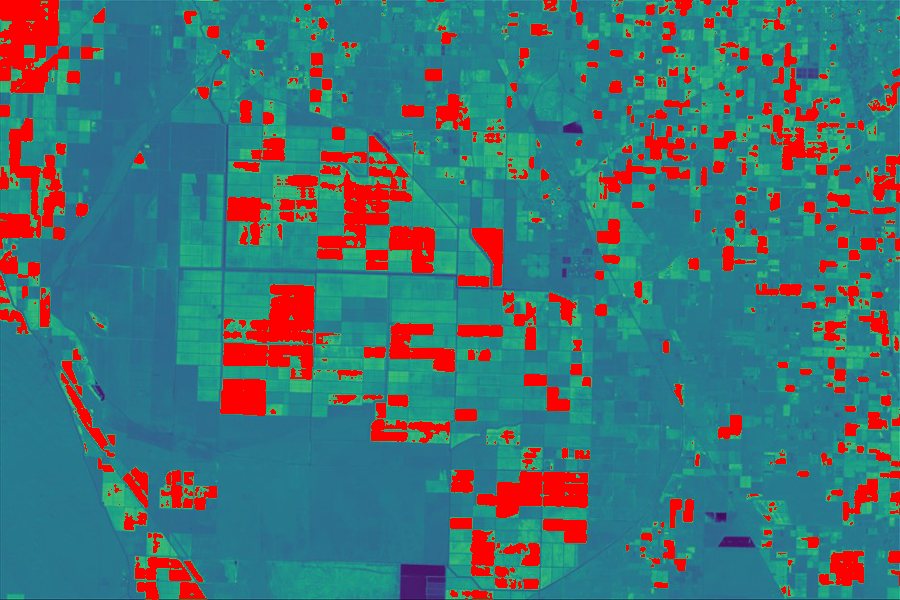

        rouge  vert  bleu
0         255     0     0
1         255     0     0
2         255     0     0
3         255     0     0
4         255     0     0
...       ...   ...   ...
539995      7    96    85
539996      6    98    85
539997      6   100    84
539998      0    97    80
539999     18   115    98

[540000 rows x 3 columns]


In [139]:
imgBase = Image.open(image)
# imgBase.putpixel((936,594),(255,0,0))
pixelRouge = (255,0,0)
resized_img = imgBase.resize((900, 600))
parcours = 0
for ligne in range(600) :
    for colonne in range(900) :
        if color_labels[parcours] == 1 : 
            resized_img.putpixel((colonne,ligne),pixelRouge)
            df.iloc[parcours] = pixelRouge
        parcours=parcours+1
display(resized_img)
print(df)

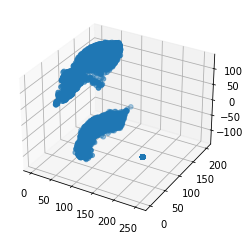

In [158]:
ax = plt.axes(projection='3d')
ax.scatter(df.rouge,df.vert,df.bleu)

In [156]:
percentVeget = counts[1] / (counts[0]+counts[1])
print(percentVeget)

0.13286296296296296
